In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
heart_clean_df = pd.read_csv('clean_heart.csv')

In [22]:
heart_clean_df = heart_clean_df.drop(labels='Unnamed: 0', axis=1)

In [37]:
if heart_clean_df['Sex'].dtype != 'object':
    heart_clean_df['Sex'] = heart_clean_df['Sex'].replace(to_replace=[1, 0], value=['M','F'])
    
female_df = heart_clean_df[heart_clean_df.Sex.str.contains("F")]
female_df.Sex.nunique()

1

In [38]:
female_df.head()

,Age,Sex,RestingBP,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Cholesterol,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
1,0.428571,F,0.80,0.0,0.676056,0.0,0.409091,0.183398,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.408163,F,0.69,0.0,0.338028,1.0,0.465909,0.249035,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.346939,F,0.65,0.0,0.774648,0.0,0.295455,0.293436,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,0.408163,F,0.60,0.0,0.422535,0.0,0.295455,0.384170,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10,0.183673,F,0.65,0.0,0.577465,0.0,0.295455,0.243243,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [42]:
heart_original = pd.read_csv('heart.csv')

female_origin = heart_original[heart_original.Sex.str.contains("F")]
female_origin.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0


In [43]:
female_origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 1 to 916
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             193 non-null    int64  
 1   Sex             193 non-null    object 
 2   ChestPainType   193 non-null    object 
 3   RestingBP       193 non-null    int64  
 4   Cholesterol     193 non-null    int64  
 5   FastingBS       193 non-null    int64  
 6   RestingECG      193 non-null    object 
 7   MaxHR           193 non-null    int64  
 8   ExerciseAngina  193 non-null    object 
 9   Oldpeak         193 non-null    float64
 10  ST_Slope        193 non-null    object 
 11  HeartDisease    193 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 19.6+ KB


In [44]:
female_origin.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,52.492228,132.212435,241.196891,0.134715,146.139896,0.668912,0.259067
std,9.517593,19.392638,85.195441,0.342307,22.154902,0.956865,0.439262
min,30.000000,94.000000,0.000000,0.000000,90.000000,0.000000,0.000000
25%,46.000000,120.000000,204.000000,0.000000,130.000000,0.000000,0.000000
50%,53.000000,130.000000,243.000000,0.000000,150.000000,0.000000,0.000000
75%,60.000000,140.000000,288.000000,0.000000,163.000000,1.100000,1.000000
max,76.000000,200.000000,564.000000,1.000000,192.000000,6.200000,1.000000


In [66]:
#split data between females w/ heart disease and not for later EDA
#split male data for comparison of how much dummy data needs to be generated

male_with_df = heart_original[heart_original.Sex.str.contains("M")][heart_original.HeartDisease == 1]
male_without_df = heart_original[heart_original.Sex.str.contains("M")][heart_original.HeartDisease == 0]

female_w_disease = female_origin[female_origin.HeartDisease == 1]
female_wo_disease = female_origin[female_origin.HeartDisease == 0]

print(female_w_disease.HeartDisease.value_counts())
print(female_wo_disease.HeartDisease.value_counts())

print(male_with_df.HeartDisease.value_counts())
print(male_without_df.HeartDisease.value_counts())

1    50
Name: HeartDisease, dtype: int64
0    143
Name: HeartDisease, dtype: int64
1    458
Name: HeartDisease, dtype: int64
0    267
Name: HeartDisease, dtype: int64


<ipython-input-66-bc05ead23978>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_with_df = heart_original[heart_original.Sex.str.contains("M")][heart_original.HeartDisease == 1]
<ipython-input-66-bc05ead23978>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_without_df = heart_original[heart_original.Sex.str.contains("M")][heart_original.HeartDisease == 0]


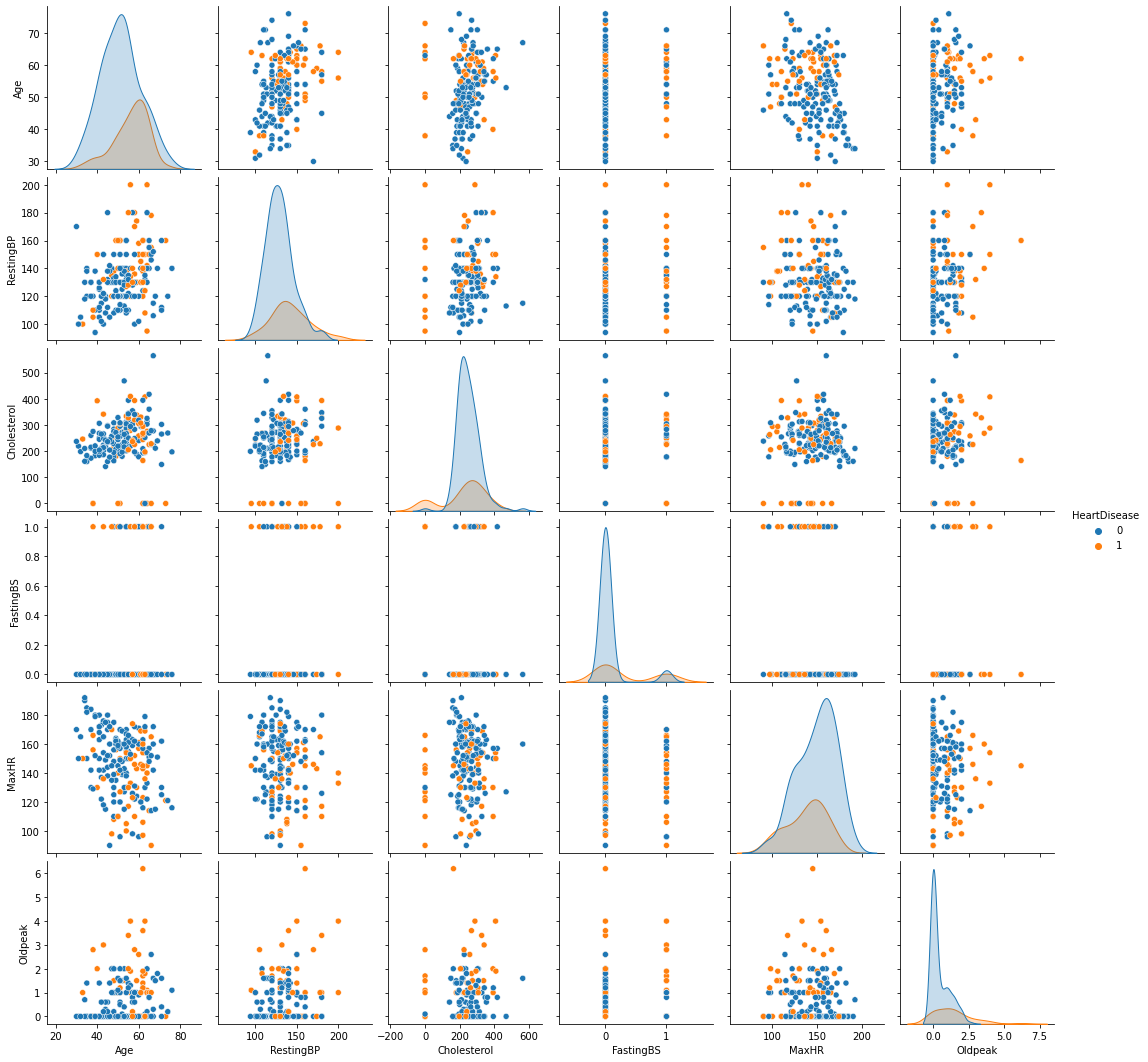

In [68]:
sns.pairplot(data=female_origin, hue='HeartDisease')

<AxesSubplot:>

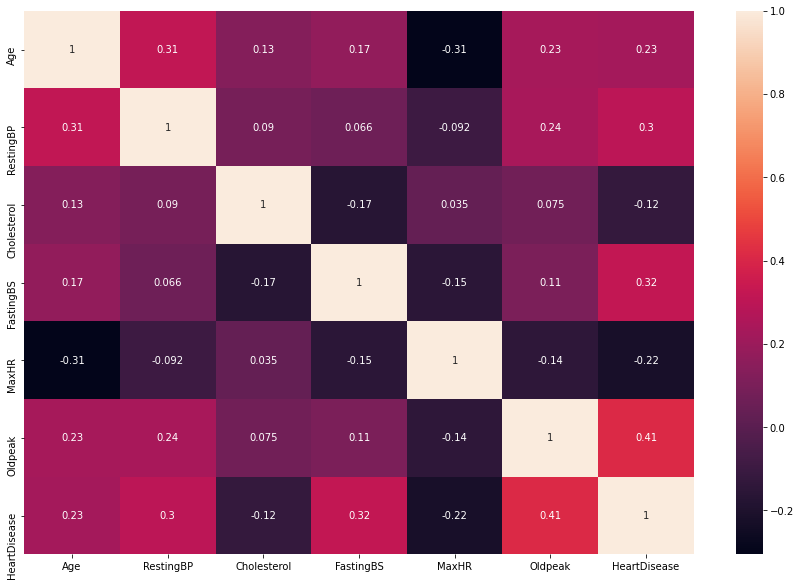

In [75]:
corr = female_origin.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [82]:
def distplots(df):
    for i, col in enumerate(df.columns, 1):
        plt.subplot(4,3,i)
        plt.title(f"Distribution for {col}")
        sns.histplot(df[col], kde=True)
        plt.tight_layout()
        plt.plot()

C:\Users\JMumf\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


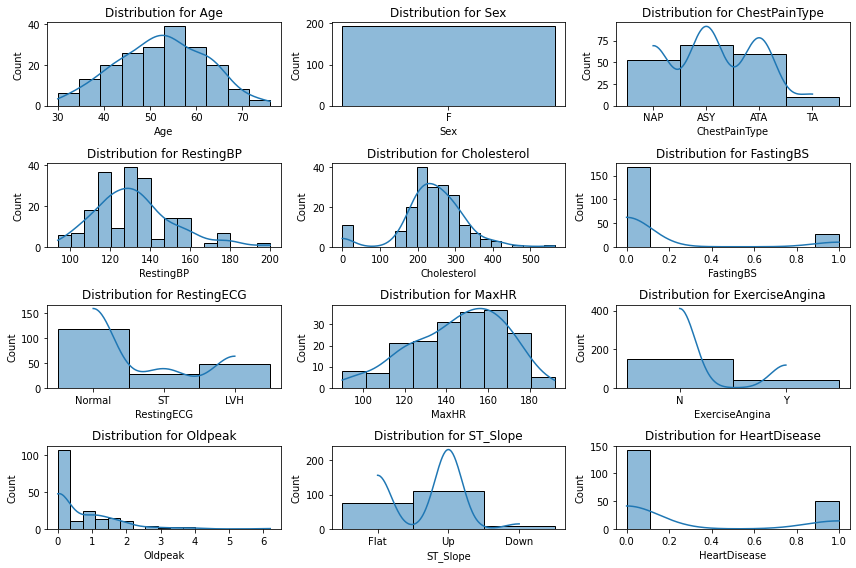

In [83]:
plt.figure(figsize=(12,8))
distplots(female_origin)